# Function to create Train, Test files from Performance Summary 

The following function create_train_test_sample can be executed to generate the train and test files from performancesummary.csv file.
This file is very large and has imnbalanced data. Hence, we perform Random Udersampling of the Non-Delinquent class to try to balance the dataset.
After this process, the train and test files will be stored at the datapath /src/assignment3/data/
as train_with_time.csv and test_with_time.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.neighbors import NearestNeighbors
import datetime
from matplotlib.finance import date2num
from sklearn.cross_validation import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import os

def create_train_test_sample():
    DATAPATH=os.environ['DATAPATH']+"/"
    CONFIGFILEPATH = os.environ['CONFIGPATH']+"/"

    FILENAMEORIG="originationsummary.csv"
    FILENAMESUMMARY="performancesummary.csv"
    OUTPUTRESAMPLEDTRAIN="train_with_time.csv"
    OUTPUTRESAMPLEDTEST="test_with_time.csv"

    print("Splitting Performance data into train and test.")
    df_summary=pd.read_csv(DATAPATH+FILENAMESUMMARY)
    df_summary['MONTHLY_REPORT_PERIOD']=df_summary['MONTHLY_REPORT_PERIOD'].apply(lambda x : x.replace('-',''))
    cols=['CUR_ACT_UPB','LOAN_AGE','MONTHS_LEGAL_MATURITY','CURR_INTERESTRATE','CURR_DEF_UPB','MONTHLY_REPORT_PERIOD']
    X_train,X_test,y_train,y_test = train_test_split(df_summary[cols],df_summary['CUR_LOAN_DELQ_STAT'],train_size=0.7)
    df_summary=""
    print("Performing Random Undersampling on the train data.")
    us=RandomUnderSampler(ratio=0.5,random_state=1)
    X_train, y_train = us.fit_sample(X_train, y_train)
    X_train=pd.DataFrame(data=X_train[0:,0:],columns=cols)
    X_train['CUR_LOAN_DELQ_STAT']=pd.Series(data=y_train)

    X_test['CUR_LOAN_DELQ_STAT']=y_test

    print("Saving Train and Test Files")
    X_train.to_csv(DATAPATH+OUTPUTRESAMPLEDTRAIN,index=False)
    X_test.to_csv(DATAPATH+OUTPUTRESAMPLEDTEST,index=False)

In [ ]:
create_train_test_sample()

# Pre-Analysis

The following was performed to determine strategies to sample data and tst code. The results were used for creating the above function.

In [2]:
MAINPATH=r"C:\Users\visha\Desktop\MSIS\Advanced Data Science\Assignments\Assignment3\data"
FILENAMEORIG="sample_orig_2007.txt"
FILENAMESUMMARY="performancesummary.csv"
OUTPUTRESAMPLEDTRAIN=r"train.csv"
OUTPUTRESAMPLEDTEST=r"test.csv"

In [3]:
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', 500)

In [4]:
df=pd.read_csv(r""+MAINPATH+"/"+FILENAMESUMMARY)

In [5]:
df

,MONTHLY_REPORT_PERIOD,CUR_ACT_UPB,CUR_LOAN_DELQ_STAT,LOAN_AGE,MONTHS_LEGAL_MATURITY,CURR_INTERESTRATE,CURR_DEF_UPB
0,2002-01-01,42058.58,0,42,317,6.875,0.0
1,2002-01-01,42011.81,0,43,316,6.875,0.0
2,2002-01-01,41964.77,0,44,315,6.875,0.0
3,2002-01-01,41917.46,0,45,314,6.875,0.0
4,2002-01-01,41869.88,0,46,313,6.875,0.0
5,2003-01-01,0.00,0,47,312,6.875,0.0
6,2003-01-01,116426.12,0,45,315,6.000,0.0
7,2003-01-01,116272.52,0,46,314,6.000,0.0
8,2003-01-01,116118.15,0,47,313,6.000,0.0
9,2003-01-01,115963.01,0,48,312,6.000,0.0


In [7]:
def balanced_subsample(x,y,subsample_size=1.0):

    class_xs = []
    min_elems = None

    for yi in np.unique(y):
        elems = x[(y == yi)]
        class_xs.append((yi, elems))
        if min_elems == None or elems.shape[0] < min_elems:
            min_elems = elems.shape[0]

    use_elems = min_elems
    if subsample_size < 1:
        use_elems = int(min_elems*subsample_size)

    xs = []
    ys = []

    for ci,this_xs in class_xs:
        if len(this_xs) > use_elems:
            this_xs = this_xs.reindex(np.random.permutation(this_xs.index))

        x_ = this_xs[:use_elems]
        y_ = np.empty(use_elems)
        y_.fill(ci)

        xs.append(x_)
        ys.append(y_)

    xs = pd.concat(xs)
    ys = pd.Series(data=np.concatenate(ys),name='target')

    return xs,ys

In [7]:
df['MONTHLY_REPORT_PERIOD']=df['MONTHLY_REPORT_PERIOD'].apply(lambda x : x.replace('-',''))

In [6]:
cols=['CUR_ACT_UPB','LOAN_AGE','MONTHS_LEGAL_MATURITY','CURR_INTERESTRATE','CURR_DEF_UPB','MONTHLY_REPORT_PERIOD']

In [ ]:
X=df[cols]
Y=df['CUR_LOAN_DELQ_STAT']

In [8]:
X_train,X_test,y_train,y_test = train_test_split(df[cols],df['CUR_LOAN_DELQ_STAT'],train_size=0.7)

In [46]:
y_train.value_counts()

0    26649842
1      978591
Name: CUR_LOAN_DELQ_STAT, dtype: int64

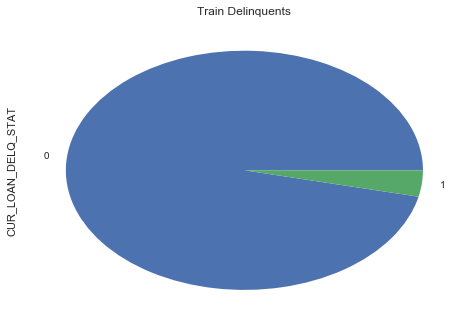

In [35]:
y_train.value_counts().plot(kind='pie',title='Train Delinquents')
plt.show()

In [23]:
y_test.value_counts()

0    11421171
1      419587
Name: CUR_LOAN_DELQ_STAT, dtype: int64

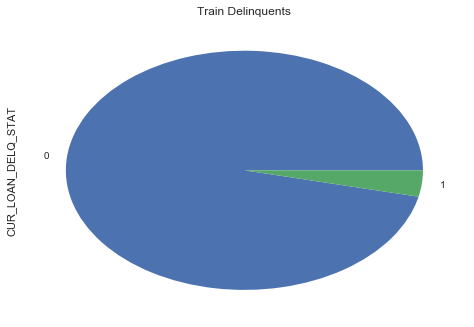

In [17]:
y_test.value_counts().plot(kind='pie',title='Train Delinquents')
plt.show()

### Performing Random Undersamapling

In [ ]:
RND_SEED=0
sm_enn = SMOTEENN(ratio=0.5,k=5,size_ngh=5,random_state=1)
X_train_resampled, y_train_resampled = sm_enn.fit_sample(X_train, y_train)

In [9]:
us=RandomUnderSampler(ratio=0.5,random_state=1)
X_train_resampled, y_train_resampled = us.fit_sample(X_train, y_train)

In [16]:
X_train_resampled_df = pd.DataFrame(data=X_train_resampled[0:,0:],columns=cols)

In [11]:
y_train_resampled_series=pd.Series(data=y_train_resampled)

In [ ]:
y_train

In [12]:
y_train_resampled_series.value_counts()

0    1956698
1     978349
dtype: int64

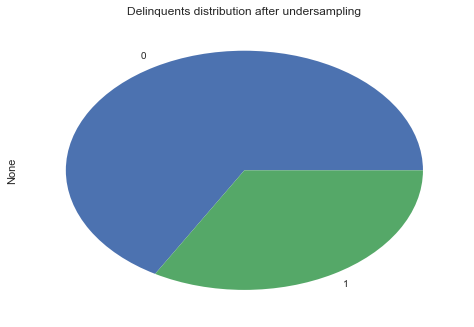

In [13]:
y_train_resampled_series.value_counts().plot(kind='pie',title='Delinquents distribution after undersampling')
plt.show()

In [26]:
y_test.value_counts()

0    11421171
1      419587
Name: CUR_LOAN_DELQ_STAT, dtype: int64

In [17]:
X_train_resampled_df['CUR_LOAN_DELQ_STAT']=y_train_resampled_series

In [47]:
X_train_resampled_df.head()

,CUR_ACT_UPB,LOAN_AGE,MONTHS_LEGAL_MATURITY,CURR_INTERESTRATE,CURR_DEF_UPB,CUR_LOAN_DELQ_STAT
0,513493.65,26.0,334.0,6.125,0.0,1
1,127391.15,41.0,319.0,8.250,0.0,1
2,88262.33,65.0,461.0,4.625,0.0,1
3,0.00,75.0,285.0,6.750,0.0,1
4,59444.07,12.0,348.0,6.500,0.0,1


In [ ]:
X_train_resampled_df

In [20]:
X_test['CUR_LOAN_DELQ_STAT']=y_test

In [54]:
X_train_resampled_df.count()

CUR_ACT_UPB              2935653
LOAN_AGE                 2935653
MONTHS_LEGAL_MATURITY    2935653
CURR_INTERESTRATE        2935653
CURR_DEF_UPB             2935653
CUR_LOAN_DELQ_STAT       2935653
dtype: int64

In [55]:
X_test.count()

CUR_ACT_UPB              11840758
LOAN_AGE                 11840758
MONTHS_LEGAL_MATURITY    11840758
CURR_INTERESTRATE        11840758
CURR_DEF_UPB             11840758
CUR_LOAN_DELQ_STAT       11840758
dtype: int64

### Saving the train and Test files

In [22]:
X_train_resampled_df.to_csv(MAINPATH+"/"+OUTPUTRESAMPLEDTRAIN,index=False)
X_test.to_csv(MAINPATH+"/"+OUTPUTRESAMPLEDTEST,index=False)

In [19]:
X_train_resampled_df

,CUR_ACT_UPB,LOAN_AGE,MONTHS_LEGAL_MATURITY,CURR_INTERESTRATE,CURR_DEF_UPB,MONTHLY_REPORT_PERIOD,CUR_LOAN_DELQ_STAT
0,192524.06,71.0,289.0,5.125,0.0,20150101.0,1
1,23492.34,88.0,272.0,7.625,0.0,20060101.0,1
2,117760.13,68.0,292.0,6.375,0.0,20110101.0,1
3,109472.78,61.0,299.0,5.500,0.0,20120101.0,1
4,98003.26,22.0,338.0,7.250,0.0,20010101.0,1
5,202130.30,92.0,449.0,5.500,0.0,20130101.0,1
6,66699.35,50.0,310.0,8.000,0.0,20050101.0,1
7,137132.47,32.0,470.0,6.750,0.0,20110101.0,1
8,117980.42,119.0,241.0,5.750,0.0,20130101.0,1
9,216181.35,91.0,269.0,5.500,0.0,20120101.0,1


In [21]:
X_test.head()

,CUR_ACT_UPB,LOAN_AGE,MONTHS_LEGAL_MATURITY,CURR_INTERESTRATE,CURR_DEF_UPB,MONTHLY_REPORT_PERIOD,CUR_LOAN_DELQ_STAT
33591880,111858.97,17,103,3.250,0.0,20130101,0
38317287,386384.15,13,167,3.125,0.0,20150101,0
6337756,192085.09,127,233,6.375,0.0,20130101,1
8679804,112206.05,16,344,6.500,0.0,20040101,0
22360898,166759.38,8,352,6.750,0.0,20080101,0


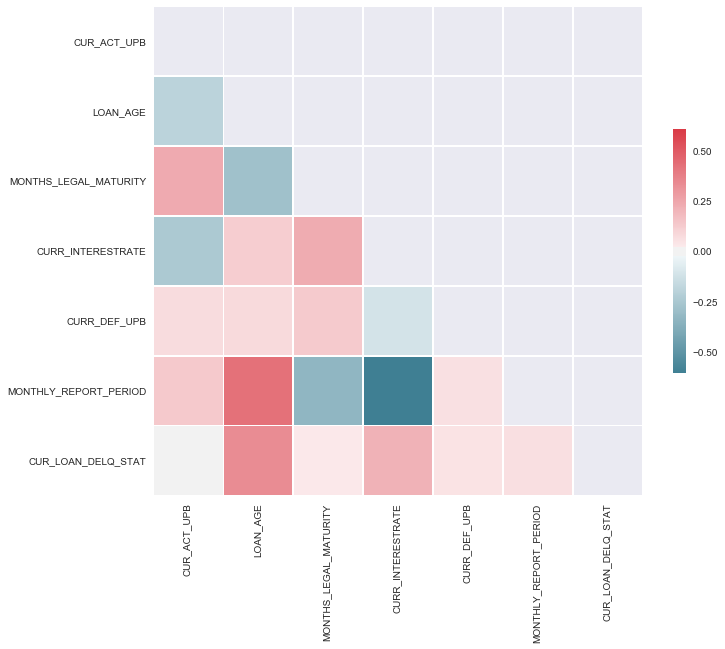

In [23]:
#df_coll = df_orig_specific[['OG_INTERESTRATE','NUM_BORROWERS','OG_LOANTERM','NUM_UNITS','MI_PERCENT','MSA','OG_CLTV','OG_LTV','OG_UPB','CREDIT_SCORE','OG_DTI']]
# Compute the correlation matrix

df_coll=X_train_resampled_df
corr = df_coll.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [11]:
df=pd.read_csv(r""+MAINPATH+"\\train_with_time.csv")

In [13]:
df.dtypes

CUR_ACT_UPB              float64
LOAN_AGE                 float64
MONTHS_LEGAL_MATURITY    float64
CURR_INTERESTRATE        float64
CURR_DEF_UPB             float64
MONTHLY_REPORT_PERIOD    float64
CUR_LOAN_DELQ_STAT         int64
dtype: object